## INSTRUCTIONS - IMPORTANT:



**Please note that this dataset has been modified and adapted for the scope of this academic assignment. If you are interested in the original data or further Airbnb datasets, we encourage you to visit Inside Airbnb's website: [insideairbnb.com](http://insideairbnb.com).**


<h3> This assignment is divided into two main components: </h3>

1. **Data Manipulation**: Focused on cleaning and preparing the dataset.
2. **Exploratory Data Analysis (EDA)**: Concentrated on analyzing and interpreting the data.

# PART-1 (Data Cleaning and Manipulation)

We will begin by importing the required modules and reading the data file.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("airbnb_final.csv")

In [ ]:
df.head()
#gives first five rows 

,host_id,neighbourhood,latitude,longitude,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,shared
1,59484.0,Centrum-Oost,52.36407,4.89393,Private room,106.0,1.0,0.0,Townhouse,Amsterdam,4.44,1.0,1.0,NaN,private
2,1100324.0,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,private
3,748161.0,Oud-Oost,52.36420,4.92829,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,private
4,97647.0,Centrum-West,52.38761,4.89188,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,private


### **What is the shape of the dataset?**

In [4]:
#Shape Code goes here
df.shape

(7608, 15)

### **Identify the data types of each column. Are there any columns that need type conversion?**

In [ ]:
# Code to identify data types goes here.
df.dtypes #types of data

host_id             float64
neighbourhood        object
latitude            float64
longitude           float64
room_type            object
price in $          float64
minimum_nights      float64
availability_365    float64
Apartment_type       object
City                 object
Rating              float64
No_of_bed_rooms     float64
No_of_beds          float64
No_of_bathrooms     float64
Bathroom_type        object
dtype: object

In [ ]:
# change the host_id column to an integer 
df['host_id'] = df['host_id'].fillna(0).astype(int)

### **Are there any duplicate rows in the dataset? If yes, how would you handle them?**

In [ ]:
# check for duplicate values
df.duplicated().sum()

0

### **Check for missing values, How would you handle the missing values in the dataset?**

In [ ]:
# check for missing values
df.isnull().sum()

host_id                0
neighbourhood          0
latitude               4
longitude              6
room_type              0
price in $            10
minimum_nights         9
availability_365       1
Apartment_type         1
City                   1
Rating              1578
No_of_bed_rooms      284
No_of_beds            17
No_of_bathrooms      804
Bathroom_type          1
dtype: int64

In [ ]:
# Populate missing values in the price column with the mean.
mean_price = df['price in $'].mean()
df['price in $'].fillna(mean_price, inplace=True)

In [ ]:
# Verify that there are no more missing values in the 'price in $' column
df['price in $'].isnull().sum()

0

In [ ]:
# Populate all missing values in the City column with "Amsterdam"
df['City'].fillna('Amsterdam', inplace=True)

In [ ]:
# Verify that there are no more missing values in the 'City' column
df['City'].isnull().sum()

0

In [ ]:
#  Drop all remaining rows with missing data. Store the result in a new dataframe called df2.
columns_to_drop = ['latitude', 'longitude', 'minimum_nights', 'availability_365', 
                   'Apartment_type', 'Rating', 'No_of_bed_rooms', 'No_of_beds', 
                   'No_of_bathrooms','Bathroom_type']
df2 = df.dropna(subset=columns_to_drop)


In [ ]:

df2.head()

,host_id,neighbourhood,latitude,longitude,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,shared
2,1100324,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,private
3,748161,Oud-Oost,52.36420,4.92829,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,private
4,97647,Centrum-West,52.38761,4.89188,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,private
5,776296,De Baarsjes - Oud-West,52.36270,4.85693,Entire home/apt,170.0,3.0,157.0,Rental unit,Amsterdam,4.77,1.0,1.0,1.0,private


### Compare the shapes of the original (df) and new (df2) dataframes, and verify there are no missing values in df2.

In [ ]:
# code to show shapes of old and new dataframes
print (df.shape)
df2.shape

(7608, 15)


(5108, 15)

In [ ]:
# Code to verify no missing values
df2.isna().sum() #verify are there any missing values

host_id             0
neighbourhood       0
latitude            0
longitude           0
room_type           0
price in $          0
minimum_nights      0
availability_365    0
Apartment_type      0
City                0
Rating              0
No_of_bed_rooms     0
No_of_beds          0
No_of_bathrooms     0
Bathroom_type       0
dtype: int64

### **Drop the 'latitude' and 'longitude' columns. How does it affect the shape of the dataset?**

In [ ]:
#  Code goes here
df2.drop(columns=['latitude','longitude'],inplace=True) # Dropping the 'latitude' and 'longitude' columns from the DataFrame

In [ ]:
# Show new shape
df2.shape

(5108, 13)

### **List the  unique values in Apartment_type and Bathroom_type**

In [ ]:
# Find and list the unique apartment tpyes.
unique_apartment_type = df2['Apartment_type'].unique() 
unique_apartment_type

array(['Condo', 'Rental unit', 'Houseboat', 'Boutique hotel',
       'Guest suite', 'Home', 'Loft', 'Boat', 'Bed and breakfast',
       'Townhouse', 'Chalet', 'Guesthouse', 'Farm stay',
       'Serviced apartment', 'Barn', 'Hotel', 'Cabin', 'Villa',
       'Place to stay', 'Tiny home', 'Cottage', 'Nature lodge', 'Tower',
       'Hostel', 'Aparthotel', 'Camper/RV', 'Earthen home',
       'casa particular', 'Vacation home', 'Tent'], dtype=object)

In [ ]:
# Find and list the unuque bathroom types.
unique_bathroom_type = df2['Bathroom_type'].unique() 
unique_bathroom_type

array(['shared', 'private'], dtype=object)

### **Replace the bathroom types (shared and private) with integers (0 and 1).**

In [ ]:
# Replace the strings with integers
df2['Bathroom_type'].replace({'shared': 0, 'private': 1}, inplace=True)

In [ ]:
# Verify the changes
print (df2['Bathroom_type'].unique())
df2.head()

[0 1]


,host_id,neighbourhood,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159,Oostelijk Havengebied - Indische Buurt,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,0
2,1100324,De Pijp - Rivierenbuurt,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,1
3,748161,Oud-Oost,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,1
4,97647,Centrum-West,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,1
5,776296,De Baarsjes - Oud-West,Entire home/apt,170.0,3.0,157.0,Rental unit,Amsterdam,4.77,1.0,1.0,1.0,1


# Part - 2 (Exploratory Data Analysis)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

### **Describe the data.**

In [23]:
# Describe data here.
df2.describe()

,host_id,price in $,minimum_nights,availability_365,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
count,5.108000e+03,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000
mean,8.957354e+07,250.071427,5.344949,68.873727,4.828872,1.615114,1.615114,1.316856,0.904268
std,1.283283e+08,239.576562,40.127865,100.861524,0.214108,0.891545,0.891545,0.467762,0.294252
min,0.000000e+00,18.000000,1.000000,0.000000,1.670000,1.000000,1.000000,0.000000,0.000000
25%,8.946164e+06,149.000000,2.000000,0.000000,4.750000,1.000000,1.000000,1.000000,1.000000
50%,2.942286e+07,205.500000,3.000000,12.000000,4.890000,1.000000,1.000000,1.000000,1.000000
75%,1.051994e+08,300.000000,4.000000,114.000000,5.000000,2.000000,2.000000,1.500000,1.000000
max,5.126757e+08,10000.000000,1001.000000,365.000000,5.000000,10.000000,10.000000,5.500000,1.000000


### **Identify significant correlations.**

In [ ]:
#  Build the correlation matrix
numeric_df = df2.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

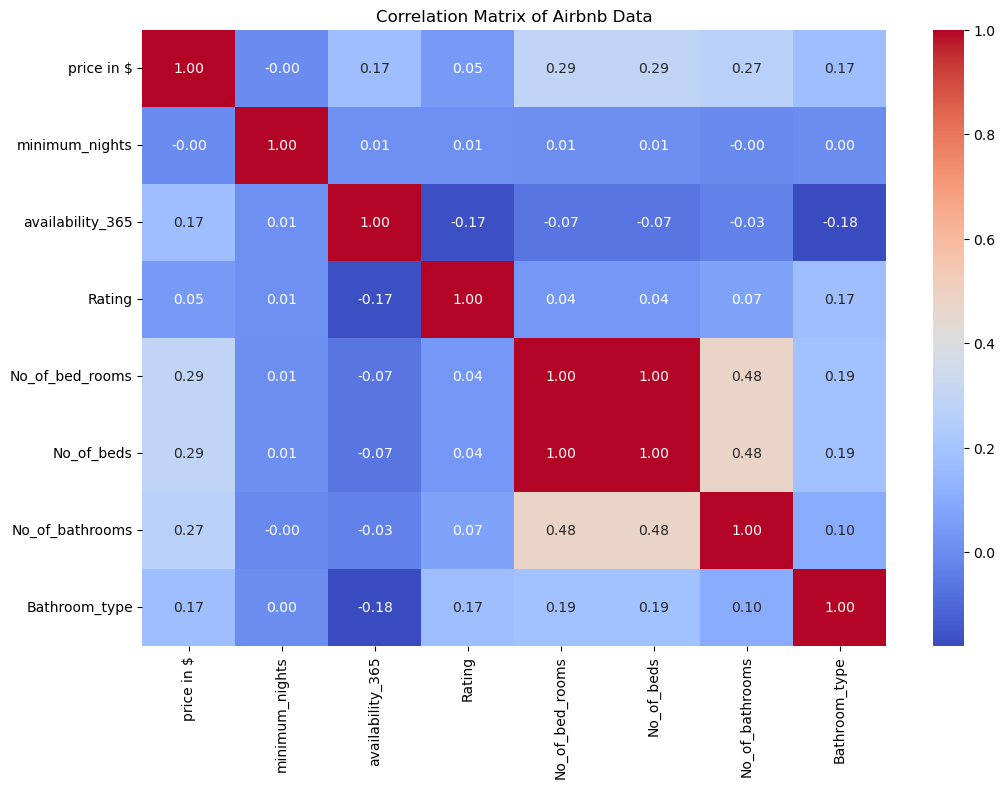

In [ ]:
# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Airbnb Data")
plt.show()

### **Check if is there any multicollinearity.**

In [ ]:
# Import the statsmodels tools needed to perform VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [ ]:
# Select all numerical columns *except* host_id.
print (df2.dtypes)

# Selecting only numerical columns and excluding 'host_id'

numerical_cols = df2[['price in $','minimum_nights','availability_365','Rating','No_of_bed_rooms','No_of_beds','No_of_bathrooms','Bathroom_type']]
                      


numerical_cols

host_id               int32
neighbourhood        object
room_type            object
price in $          float64
minimum_nights      float64
availability_365    float64
Apartment_type       object
City                 object
Rating              float64
No_of_bed_rooms     float64
No_of_beds          float64
No_of_bathrooms     float64
Bathroom_type         int64
dtype: object


,price in $,minimum_nights,availability_365,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,69.0,3.0,7.0,4.89,1.0,1.0,1.5,0
2,270.0,4.0,2.0,4.86,3.0,3.0,1.5,1
3,200.0,3.0,0.0,4.76,1.0,1.0,1.5,1
4,137.0,3.0,0.0,4.94,1.0,1.0,1.5,1
5,170.0,3.0,157.0,4.77,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...
7364,406.0,1.0,286.0,4.71,1.0,1.0,1.0,1
7365,339.0,1.0,235.0,3.67,1.0,1.0,1.0,1
7416,99.0,1.0,95.0,4.86,1.0,1.0,1.0,1
7425,106.0,1.0,19.0,5.00,1.0,1.0,1.5,0


In [ ]:
#  Make sure there are no missing (NaN) values 
# Dropping rows with NaN values for accurate VIF computation
numerical_cols = numerical_cols.dropna()

In [ ]:
#  Add a constant column for the VIF calculation
X_with_const = sm.add_constant(numerical_cols)

In [ ]:
# Calculate the VIF for each of the columns and display the information.
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(len(X_with_const.columns))]

vif_data

###  **Spot outliers in the dataset.**
(we will not remove outliers for this learning module).

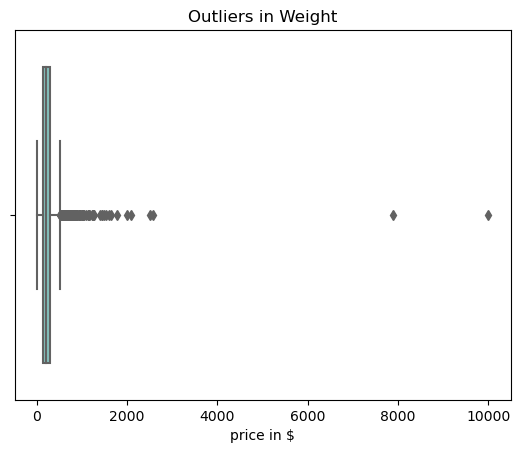

In [ ]:
#  Show boxplot of price in $ 
sns.boxplot(x='price in $', data=df2, orient='h', palette="GnBu")
plt.title('Outliers in Weight')
plt.show()

In [ ]:
# Show the maximum price in $
df2['price in $'].max()

10000.0

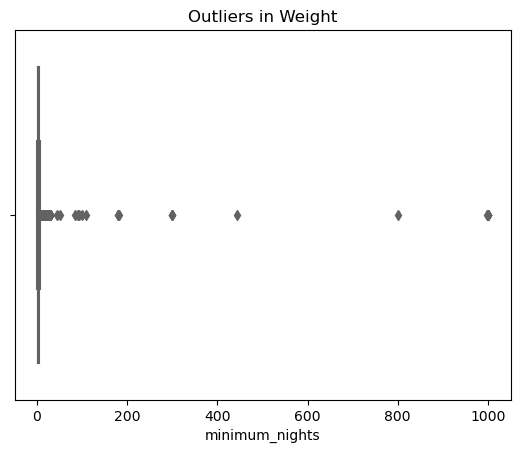

In [ ]:
# Show a boxplot for minimum_nights
sns.boxplot(x='minimum_nights', data=df2, orient='h', palette="GnBu")
plt.title('Outliers in Weight')
plt.show()

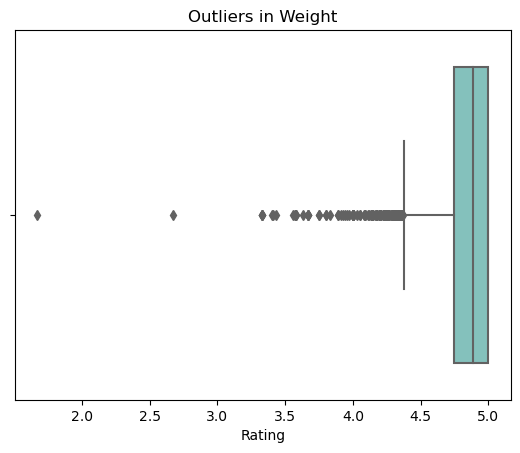

In [ ]:
# Show a boxplot for Rating
sns.boxplot(x='Rating', data=df2, orient='h', palette="GnBu")
plt.title('Outliers in Weight')
plt.show()

In [ ]:
# Define a function to drop outliers beyond a specific multiplier of the IQR.
def find_outliers_iqr(data, multiplier=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliersz = multiplier * IQR
    lower_bound = Q1 - outliersz
    upper_bound = Q3 + outliersz
    return data[(data < lower_bound) | (data > upper_bound)]

In [ ]:
#  Find outliers for 'price in $', 'minimum_nights', and 'Rating' using the standard multiplier (1.5)
outliers_price = find_outliers_iqr(df2['price in $'])
outliers_min_nights = find_outliers_iqr(df2['minimum_nights'])
outliers_rating = find_outliers_iqr(df2['Rating'])

In [ ]:
# Display the count of outliers in each selected column
outliers_count = {
    'price in $': len(outliers_price),
    'minimum_nights': len(outliers_min_nights),
    'Rating': len(outliers_rating)
}

outliers_count

{'price in $': 232, 'minimum_nights': 170, 'Rating': 209}

In [ ]:
# Find outliers for the same column using a multiplier of 3.
outliers_price = find_outliers_iqr(df2['price in $'],3)
outliers_min_nights = find_outliers_iqr(df2['minimum_nights'],multiplier=3)
outliers_rating = find_outliers_iqr(df2['Rating'],multiplier=3)

In [ ]:
# Display the new count of outliers in each selected column
outliers_count = {
    'price in $': len(outliers_price),
    'minimum_nights': len(outliers_min_nights),
    'Rating': len(outliers_rating)
}

outliers_count

{'price in $': 71, 'minimum_nights': 127, 'Rating': 31}

### **Compute the Average Price for Each Type of Listing.**

In [ ]:
# Group the data by 'room_type' and calculate the average price for each type
average_price_by_room_type = df2.groupby('room_type')['price in $'].mean().sort_values(ascending=False)

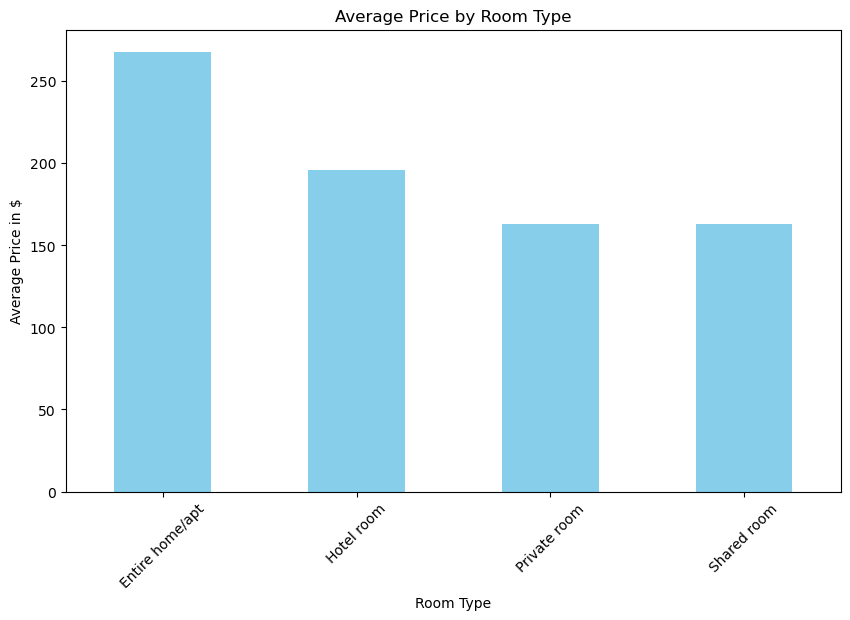

room_type
Entire home/apt    267.956400
Hotel room         195.833333
Private room       163.124324
Shared room        162.916667
Name: price in $, dtype: float64

In [ ]:
#  Plot and display  the average price for each room type
plt.figure(figsize=(10, 6))
average_price_by_room_type.plot(kind='bar', color='skyblue')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price in $')
plt.xticks(rotation=45)
plt.show()

average_price_by_room_type

### **How Many Listings Are There for Each Unique 'Apartment Type'?**

In [ ]:
# Count the frequency of each unique 'Apartment_type'
apartment_type_counts = df2['Apartment_type'].value_counts()

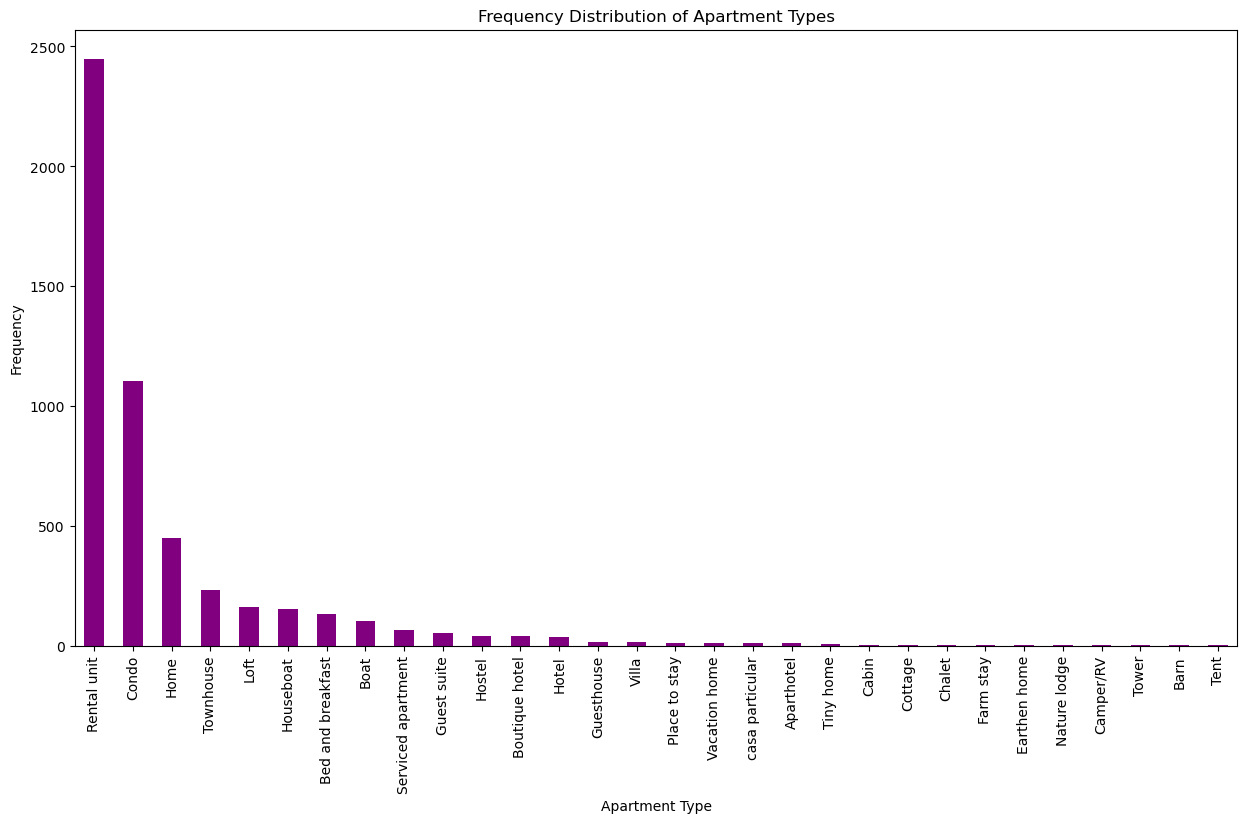

In [ ]:
# Plot the frequency distribution of 'Apartment_type'
plt.figure(figsize=(15, 8))
apartment_type_counts.plot(kind='bar', color='purple')
plt.title('Frequency Distribution of Apartment Types')
plt.xlabel('Apartment Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Display the top 10 most common apartment types
apartment_type_counts.head(10)  

Rental unit           2448
Condo                 1104
Home                   449
Townhouse              234
Loft                   159
Houseboat              154
Bed and breakfast      130
Boat                   102
Serviced apartment      66
Guest suite             51
Name: Apartment_type, dtype: int64

### **Identify the Top 5 Neighbourhoods with the Highest Average Listing Prices.**

In [ ]:
#  Find the top 5 most expensive neighbourhoods based on average price
top_5_expensive_neighbourhoods = df2.groupby('neighbourhood')['price in $'].mean().sort_values(ascending=False).head(5)

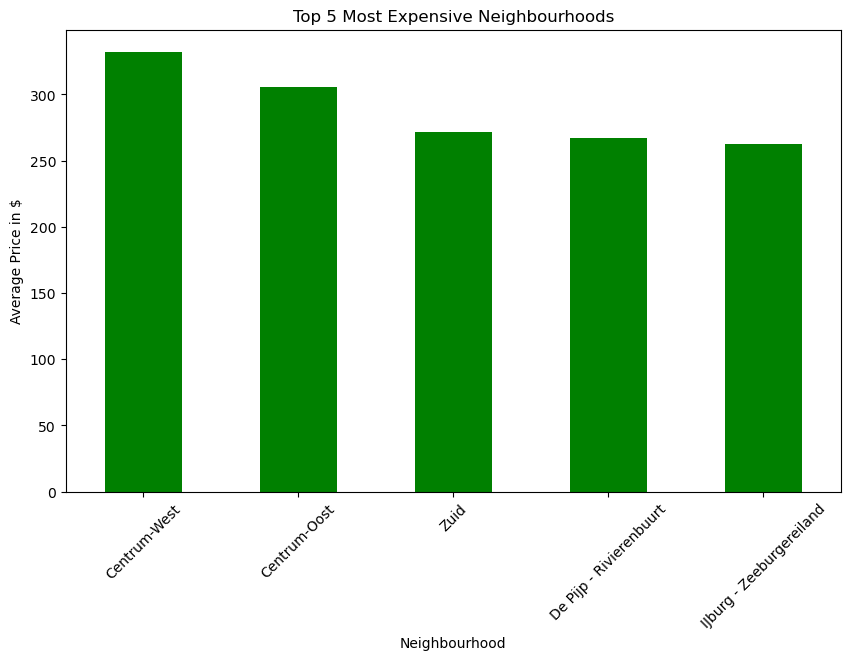

neighbourhood
Centrum-West                332.298308
Centrum-Oost                305.447601
Zuid                        271.715134
De Pijp - Rivierenbuurt     267.334606
IJburg - Zeeburgereiland    262.265746
Name: price in $, dtype: float64

In [ ]:
# Plot and display the top 5 most expensive neighbourhoods
plt.figure(figsize=(10, 6))
top_5_expensive_neighbourhoods.plot(kind='bar', color='green')
plt.title('Top 5 Most Expensive Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price in $')
plt.xticks(rotation=45)
plt.show()

top_5_expensive_neighbourhoods

###  **Which 'Apartment Types' Are Most and Least Frequently Available?**

In [ ]:
# Count the frequency of each unique 'Apartment_type' to find the most and least commonly available types
apartment_type_counts = df2['Apartment_type'].value_counts()

In [ ]:
#  Find the top 5 most commonly available and the least commonly available apartment types
top_5_common_apartment_types = apartment_type_counts.head(5)
least_common_apartment_types = apartment_type_counts.tail(5)

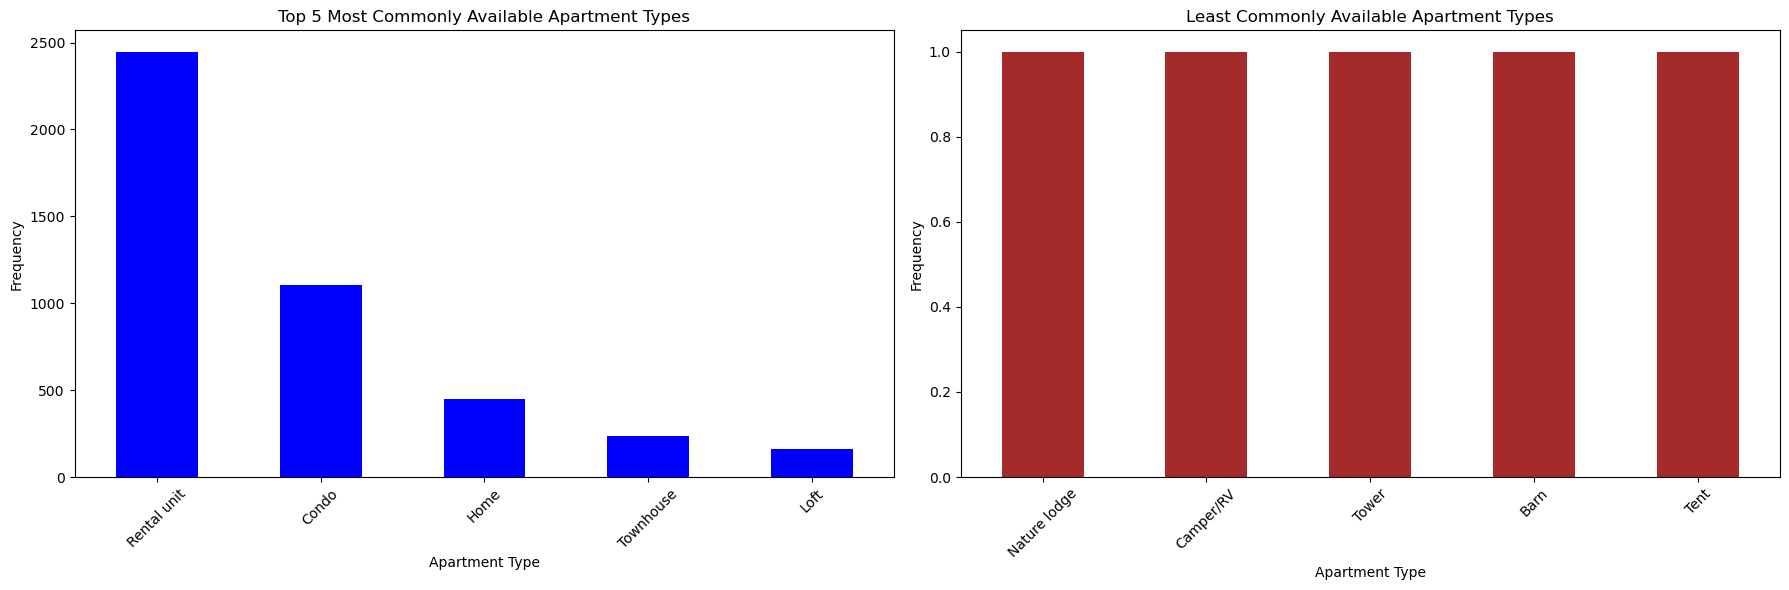

(Rental unit    2448
 Condo          1104
 Home            449
 Townhouse       234
 Loft            159
 Name: Apartment_type, dtype: int64,
 Nature lodge    1
 Camper/RV       1
 Tower           1
 Barn            1
 Tent            1
 Name: Apartment_type, dtype: int64)

In [ ]:
# Plot and display the most and least commonly available apartment types
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Most Commonly Available
top_5_common_apartment_types.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Top 5 Most Commonly Available Apartment Types')
axes[0].set_xlabel('Apartment Type')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Least Commonly Available
least_common_apartment_types.plot(kind='bar', ax=axes[1], color='brown')
axes[1].set_title('Least Commonly Available Apartment Types')
axes[1].set_xlabel('Apartment Type')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

top_5_common_apartment_types, least_common_apartment_types
